In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier,  plot_tree

import os
import random

# This code will use decsion tree classification for a binary label classification task.

# The classification model used is arbitrary the main focus is on the error metrics.

# Including:
# Confusions Matrix (2x2) inc true positives, true negatives, false positives, false negatives.
# Overall accuracy aka classification accuracy
# Misclassification Rate
# Sensitivity, hit rate, recall, or true positive rate
# Specificity or true negative rate
# Precision or positive predictive value
# F1 Score
# Negative predictive value
# Fall out or false positive rate
# False negative rate
# False discovery rate
# F1 Score
# ROC curves
# AUC
# Mean Absolute Error
# Mean Squared Error

In [2]:
# Loading the sk learn breast cancer data set

from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['target'] = pd.Series(cancer.target)

df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [3]:
# Features are all the columns except the target (has breast cancer)
X = df[df.columns[:-1]]

# Target is the has breast cancer target column
y = df['target']


In [4]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

# Instatiate a decision tree classifier object
clf_dt = DecisionTreeClassifier()

# Train the model with the training X and y
clf_dt = clf_dt.fit(X_train, y_train)


There was actually 89 +ve cases of breast cancer
There was actually 54 -ve cases of breast cancer

 The accuracy score when predicting the test data 0.9440559440559441



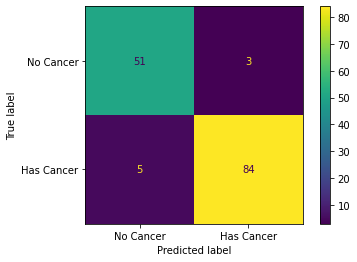

In [5]:
# predict the test data y_test
y_test_pred = clf_dt.predict(X_test)

# Then compare it to  the actual y_test data using this confusion matrix
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=["No Cancer", "Has Cancer"])

# What is the accuracy of the model when it predicts the test Data (should be lower)  
print('There was actually ' + str(y_test.sum()) + ' +ve cases of breast cancer')
print('There was actually ' + str(len(y_test)-y_test.sum()) + ' -ve cases of breast cancer')
print ('')
print(f' The accuracy score when predicting the test data {accuracy_score(y_test_pred,y_test)}')
print ('')

# Error Metrics and Confusion Matrix Analysis:

Predictions can fall into one of 4 categories:

TN = True Negative, correctly identifying the lack of event A

FN = False Negative, incorrectly identifying the lack of event A

TP = True Positive, correctly identiying event A as happening

FP = False Positive, incorrectly identiying event A as happening

We say that the positive case is the label/class/category that we are interested in that we are trying to predict.

The negative is simply the alternative.


In [6]:
# For a 2x2 stand bivariate classification task confusion matrix

from sklearn import metrics
CM = metrics.confusion_matrix(y_true = y_test, y_pred = y_test_pred)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]


In [7]:
# Overall accuracy aka classification accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)

# Misclassification Rate
MR = 1 - ACC


In [8]:
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)

# Specificity or true negative rate
TNR = TN/(TN+FP) 



In [9]:
TPR

0.9438202247191011

In [10]:
# Precision or positive predictive value
PPV = TP/(TP+FP)

# F1 Score
F1 = 2 * ((PPV*TPR)/(PPV+TPR))

# Negative predictive value
NPV = TN/(TN+FN)

# Fall out or false positive rate
FPR = FP/(FP+TN)

# False negative rate
FNR = FN/(TP+FN)

# False discovery rate
FDR = FP/(TP+FP)

# F1 Score
F1 = 2 * ((PPV*TPR)/(PPV+TPR))


In [11]:
FPR

0.05555555555555555

# ROC :

ROC is a Receiver Operator Characteristic Graph.

Say you have a DTC model and you want to alter a single parameter and see how a range of values of it can change the quality of the model.

Instead of producing a confusion matrix for every tree:

We plot a set of TPR (Sensitivity) values against FPR (1 - specificity) values, a data point for each model.


The data points with the highest TPR and lowest FPR should be considered as the optimal value for the parameter.

Usually this is the one in the nearest to the top left corner.

Why? because a perfect classifier would have 1 TPR and 0 FPR.

EXAMPLE:

![alt text](ROC.png "Title")

In [12]:
# We need to make a model for each of the potential decision trees.

# One for every combination of variables.

DTC_ParaMeters = {"criterion": [ "gini", "entropy"] ,
                  "splitter" :["best", "random"] , 
                  "max_depth" : [None,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1]} 


In [13]:
import itertools as it

allNames = sorted(DTC_ParaMeters)
combinations = it.product(*(DTC_ParaMeters[Name] for Name in allNames))
list_of_variations = list(combinations)
print(len(list_of_variations))


84


In [14]:
list_of_variations[0]

('gini', None, 'best')

In [15]:
allNames

['criterion', 'max_depth', 'splitter']

In [21]:
# Instatiate a decision tree classifier object
clf_dt = DecisionTreeClassifier(criterion = list_of_variations[0][0],  max_depth = list_of_variations[0][1], splitter = list_of_variations[0][2])

# Train the model with the training X and y
clf_dt = clf_dt.fit(X_train, y_train)

# predict the test data y_test
y_test_pred = clf_dt.predict(X_test)

CM = metrics.confusion_matrix(y_true = y_test, y_pred = y_test_pred)

TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

TPR = TP/(TP+FN)

FPR = FP/(FP+TN)

ROC_iteration = np.array([ TPR , FPR ])

Model_Results = pd.DataFrame(ROC_iteration, columns = ['TPR','FRP'])

ValueError: Shape of passed values is (2, 1), indices imply (2, 2)